# Support Vector Machine (with kernel) for classification

In the following we apply two SVM algorithms (polynomial and radial basis function aka RBF) to a classification problem (representing success/failure information). The SVM algorithm tries to construct the ideal decision/separation hyperplane for a data set only from a small amount of close data points from different categories. The C parameter allows to give emphasis or reduce emphasis of single data points such that the form of the decision hyperplane can be modulated. The SVM algorithm classifies data using a linear function which, however, is only optimal if the underlying classification problem is linear (i.e. the data is linearily separable). Otherwise, a non-linear extension may be yielded using kernel functions like that of polynomial or RBF type. The general moral is to transfer via the non-linear kernel function the problem to a higher dimensional space in which the data becomes more easily separable. For more details on SVMs we refer to https://en.wikipedia.org/wiki/Support-vector_machine, https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72, https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47 and https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python.

In [57]:
#import necessary packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import matplotlib.pyplot as plt

from helper import plot_classifier #helper.py is saved in the repository

## Case 1: simple failure/success classification with polynomial kernel

In [58]:
#define data frame
df = pd.read_csv("classification.csv")

#to trop columns 
#df = df.drop("name of column", axis = 1)

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [59]:
#define variables and proceed with train/test split
X = df[["age", "interest"]].values
Y = df["success"].values #single brackets (!) needed for classification machine learling processing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = .25)

#rescale training and test data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
#introduce SVM
from sklearn.svm import SVC

#basic idea: (x * v + coef0)^degree, algorithm tries to optimize parameter
model = SVC(kernel = "poly", degree = 2, coef0 = 1)
model.fit(X_train, Y_train)

print(model.score(X_test, Y_test))

0.9466666666666667


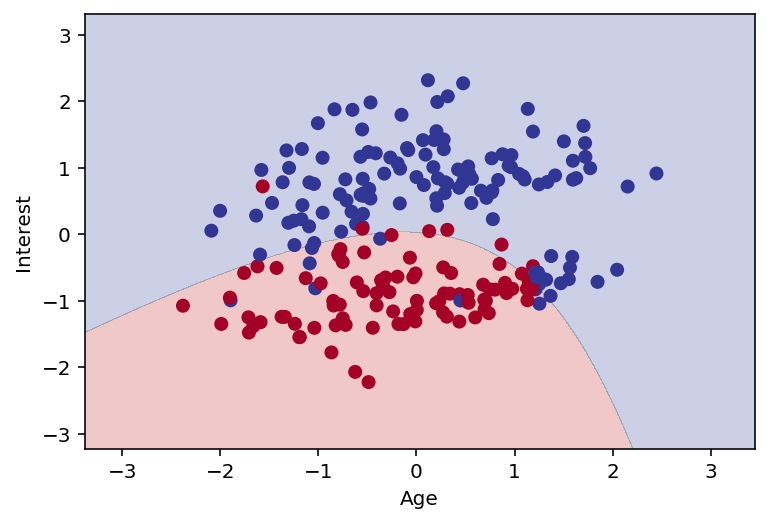

In [86]:
#visualizing the results for training and test sets
plot_classifier(model, X_train, Y_train, proba = False, xlabel = "Age", ylabel = "Interest")

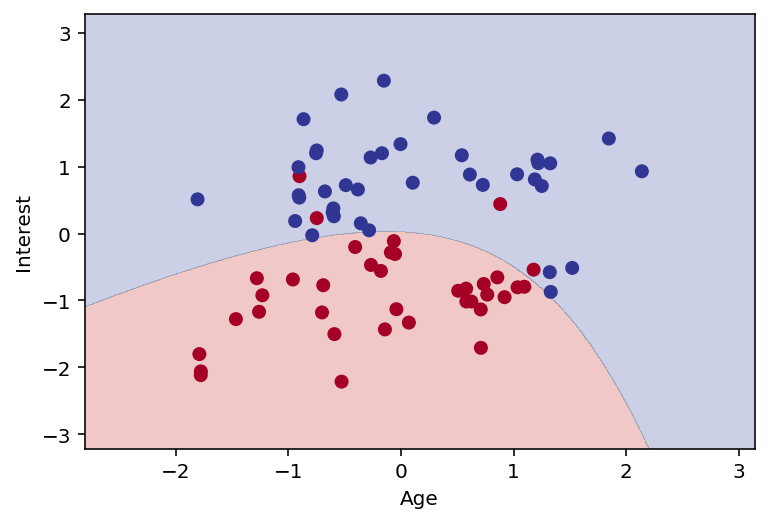

In [76]:
plot_classifier(model, X_test, Y_test, proba = False, xlabel = "Age", ylabel = "Interest")

## Case 2: simple failure/success classification with RBF kernel

In [118]:
#introduce SVM
from sklearn.svm import SVC

#Kernel form K(x,x')=exp(-||x-x'||^2/(2gamma^2))
#gamma large: kernel strongly peaked, gamma small: kernel slowly decaying wide peak
#C value as for linear kernels modulates emphasis of landmark data points
model = SVC(kernel = "rbf", gamma = 1, C = 1)
model.fit(X_train, Y_train)

print(model.score(X_test, Y_test))

0.9333333333333333


Comment: A huge value for gamma leads to bad generalization and strong adaption to pecularities of the data set while small gamma values captures the general trend of a data set. Both parameters gamma and C have to be optimized together.

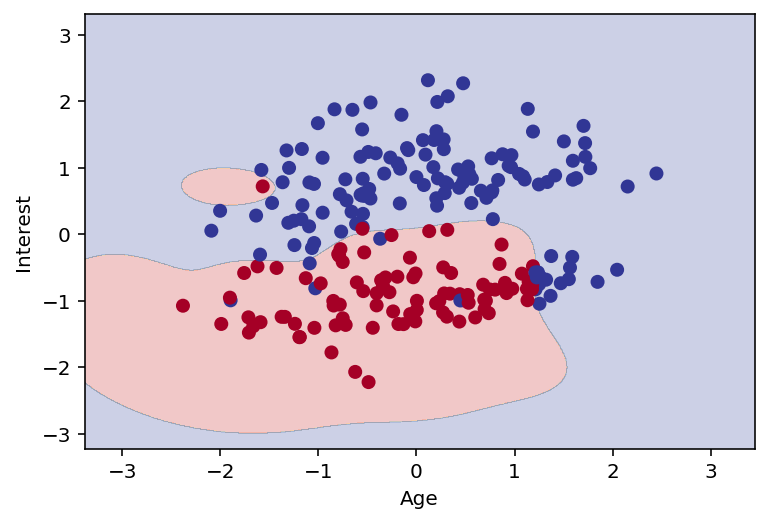

In [116]:
#visualizing the results for training and test sets
plot_classifier(model, X_train, Y_train, proba = False, xlabel = "Age", ylabel = "Interest")

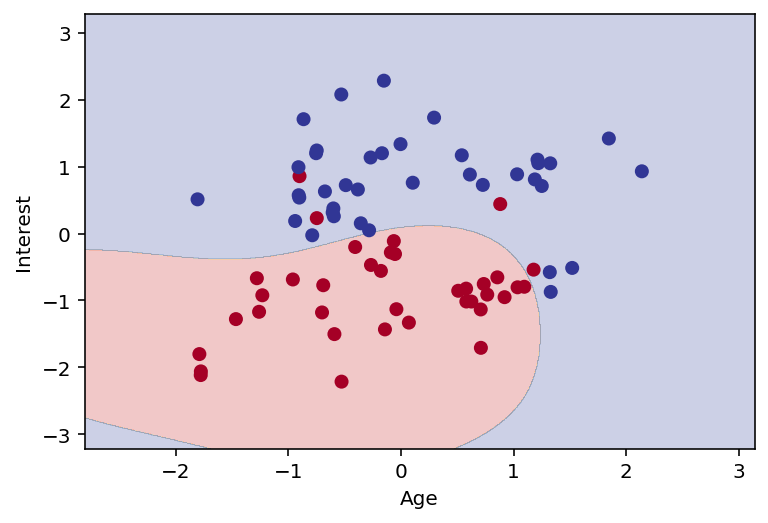

In [89]:
plot_classifier(model, X_test, Y_test, proba = False, xlabel = "Age", ylabel = "Interest")

We may visualize different scenarios for values of gamma and C below for a different data set (as provided on
https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html):

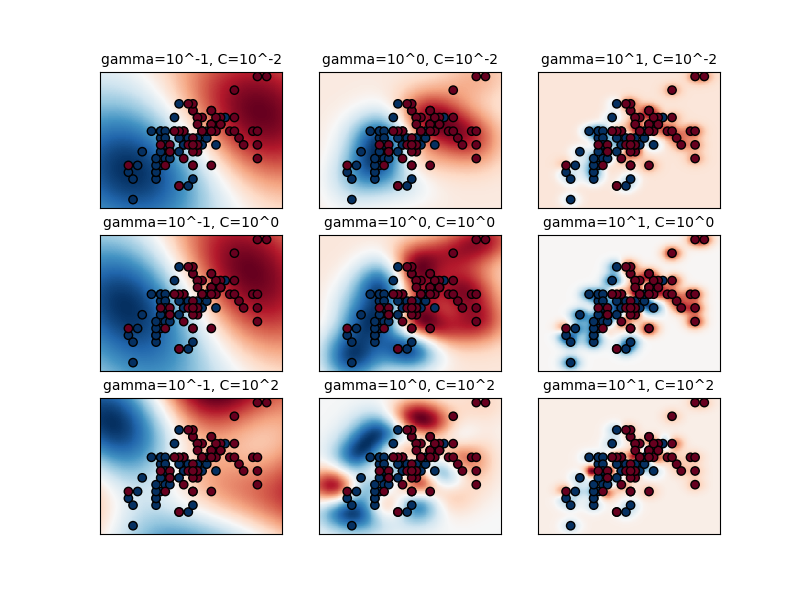

In [124]:
from IPython.display import Image
Image(filename = "picture.png", width=1000, height=1000)